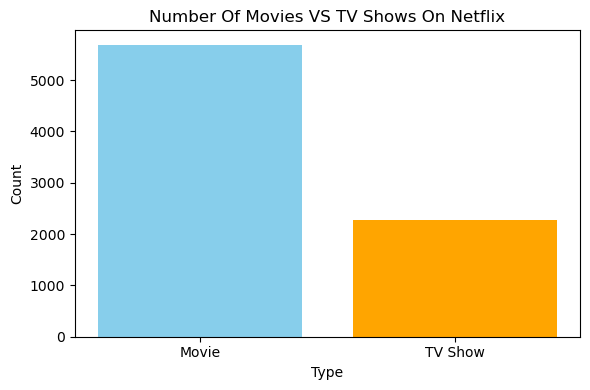

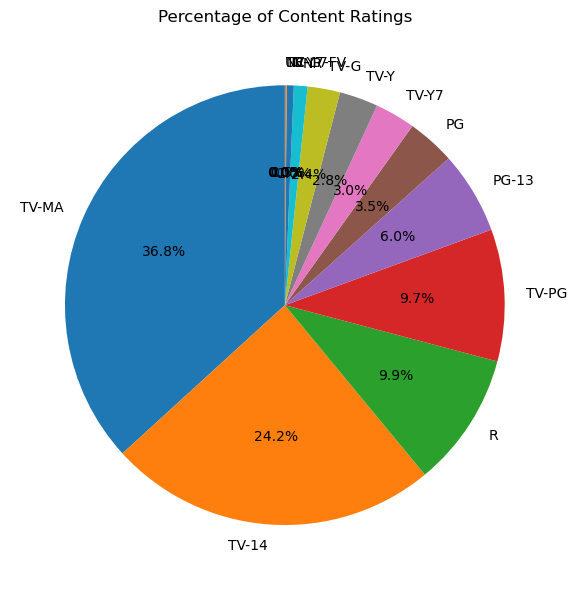

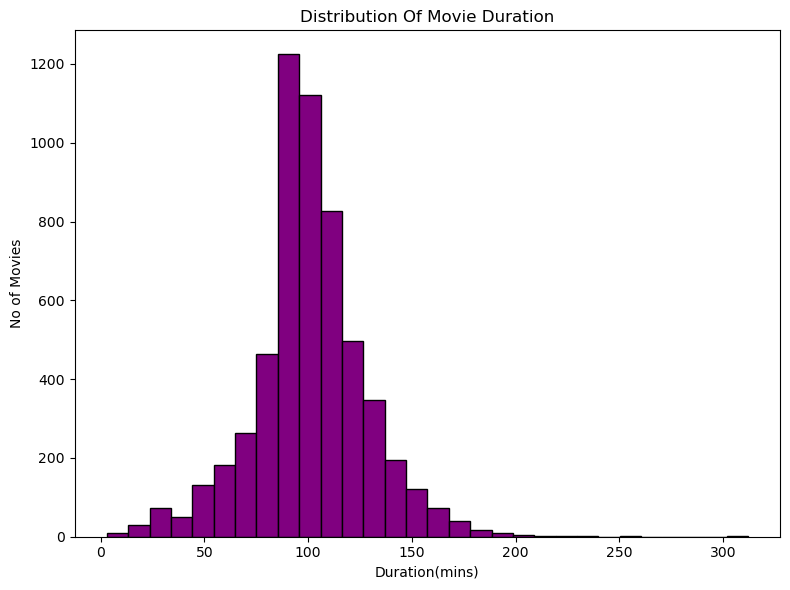

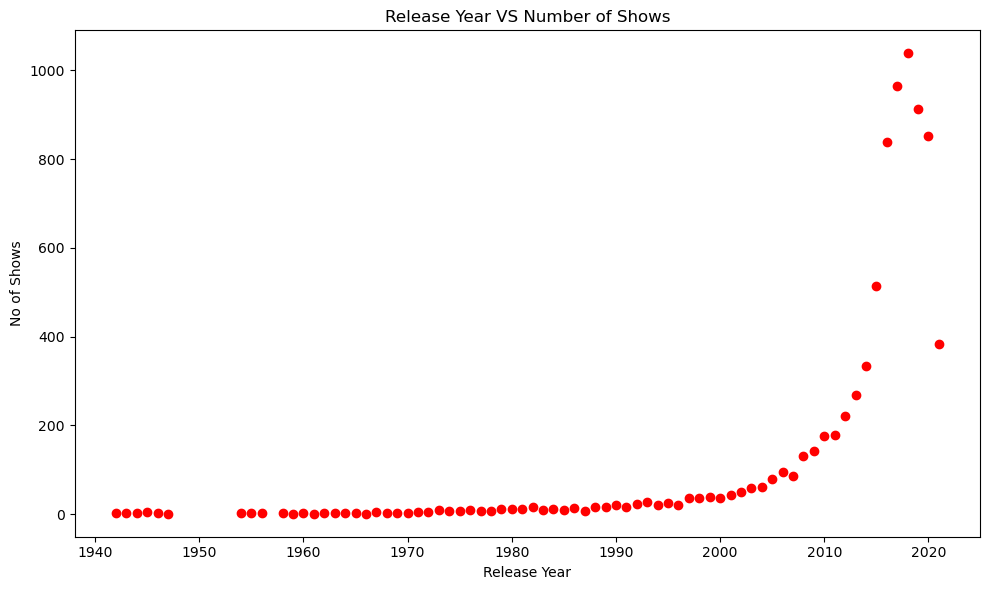

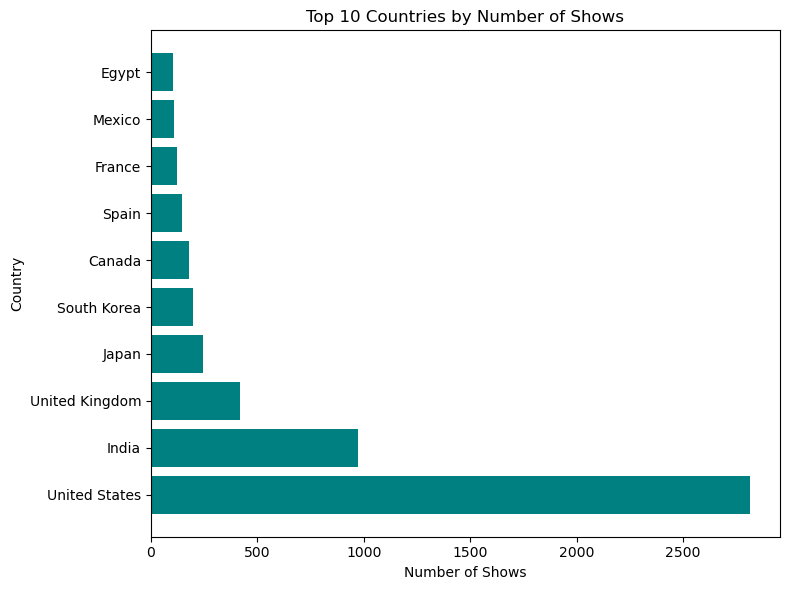

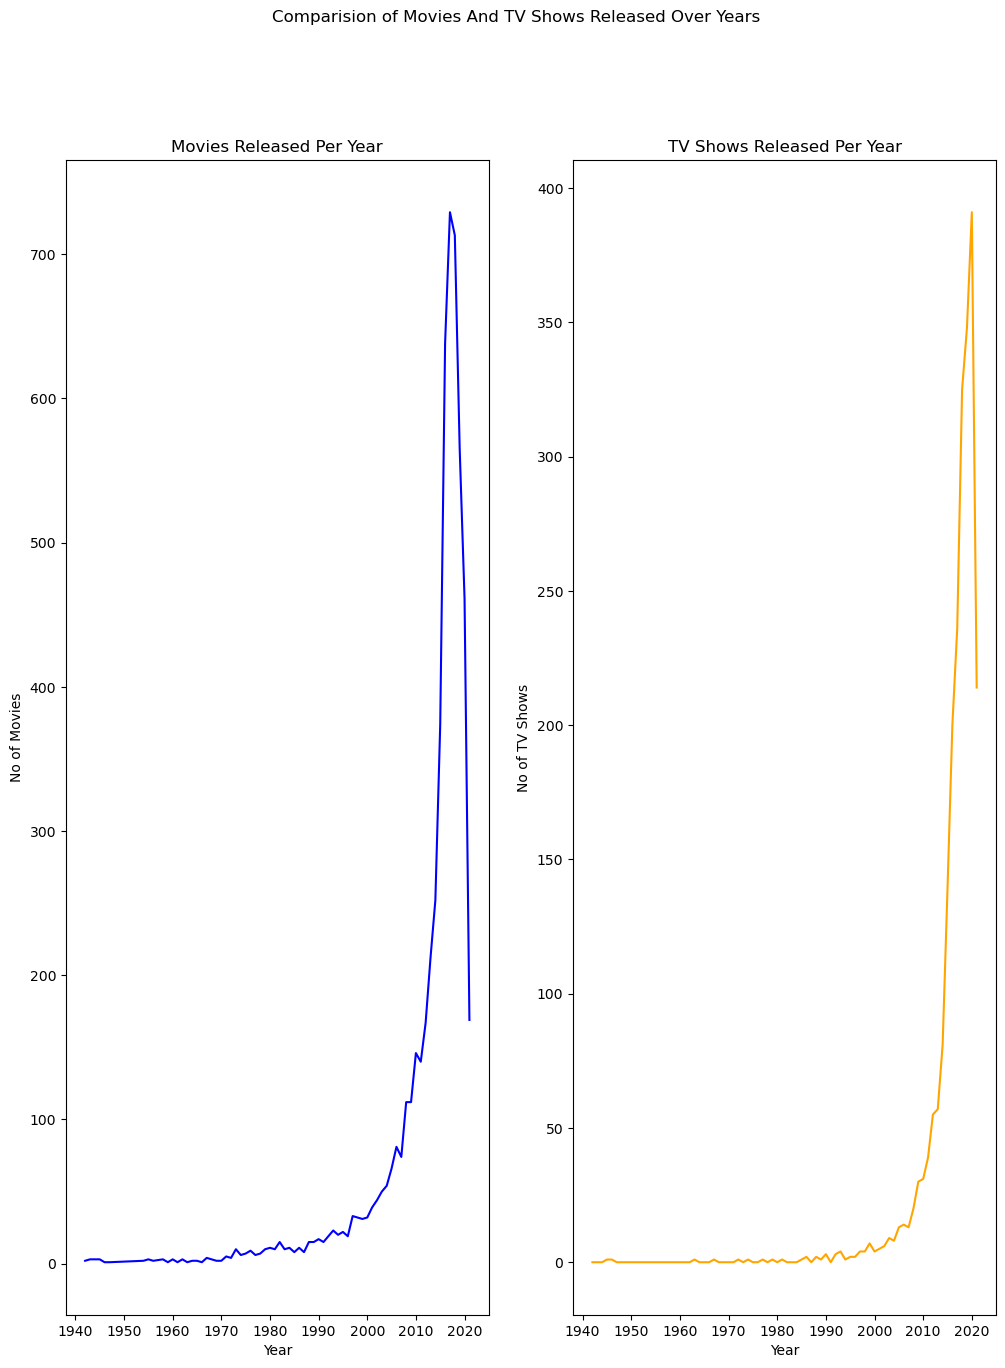

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\Rakshit\Downloads\netflix_titles.csv\netflix_titles.csv")

df=df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title("Number Of Movies VS TV Shows On Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Movies vs TVshows.png")
plt.show()

rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig("content_ratings_pie.png")
plt.show()

movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title("Distribution Of Movie Duration")
plt.xlabel("Duration(mins)")
plt.ylabel("No of Movies")
plt.tight_layout()
plt.savefig("Movies Duration histogram.png")
plt.show()

release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title("Release Year VS Number of Shows")
plt.xlabel("Release Year")
plt.ylabel("No of Shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top10_countries.png")
plt.show()

content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,15))

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel("No of Movies")

ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel("No of TV Shows")

fig.suptitle("Comparision of Movies And TV Shows Released Over Years")
plt.savefig("movies_tv_shows_comparision.png")
plt.show()